In [149]:
import pandas as pd
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib
from community import community_louvain
import seaborn as sns
from termcolor import colored
from networkx.algorithms.community import label_propagation_communities
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [150]:
#đọc dữ liệu từ file csv
dt=pd.read_csv("airline.csv", encoding="ISO-8859-1")
dt.dropna()
dt.drop_duplicates()
dt

Airline        Country
0                   Air France  United States
1                   Air France  Cote d'Ivoire
2                   Air France  United States
3                   Air France        Nigeria
4                   Air France        Nigeria
...                        ...            ...
6135  Virgin Atlantic Airlines  United States
6136  Virgin Atlantic Airlines    Saint Lucia
6137  Virgin Atlantic Airlines    Saint Lucia
6138  Virgin Atlantic Airlines    Saint Lucia
6139  Virgin Atlantic Airlines         Russia

[6140 rows x 2 columns]

In [151]:
B = nx.Graph()
Airline = dt['Airline']
Country = dt['Country']
print('So Airline', Airline.nunique())
print('So Country', Country.nunique())
print('So canh', len(dt))

So Airline 15
So Country 185
So canh 6140


In [152]:
for index, row in dt.iterrows():
    B.add_edge(row['Airline'], row['Country'], weight=1)
B.add_nodes_from(Country,bipartite=0)
B.add_nodes_from(Airline,bipartite=1)

<Figure size 864x864 with 0 Axes>

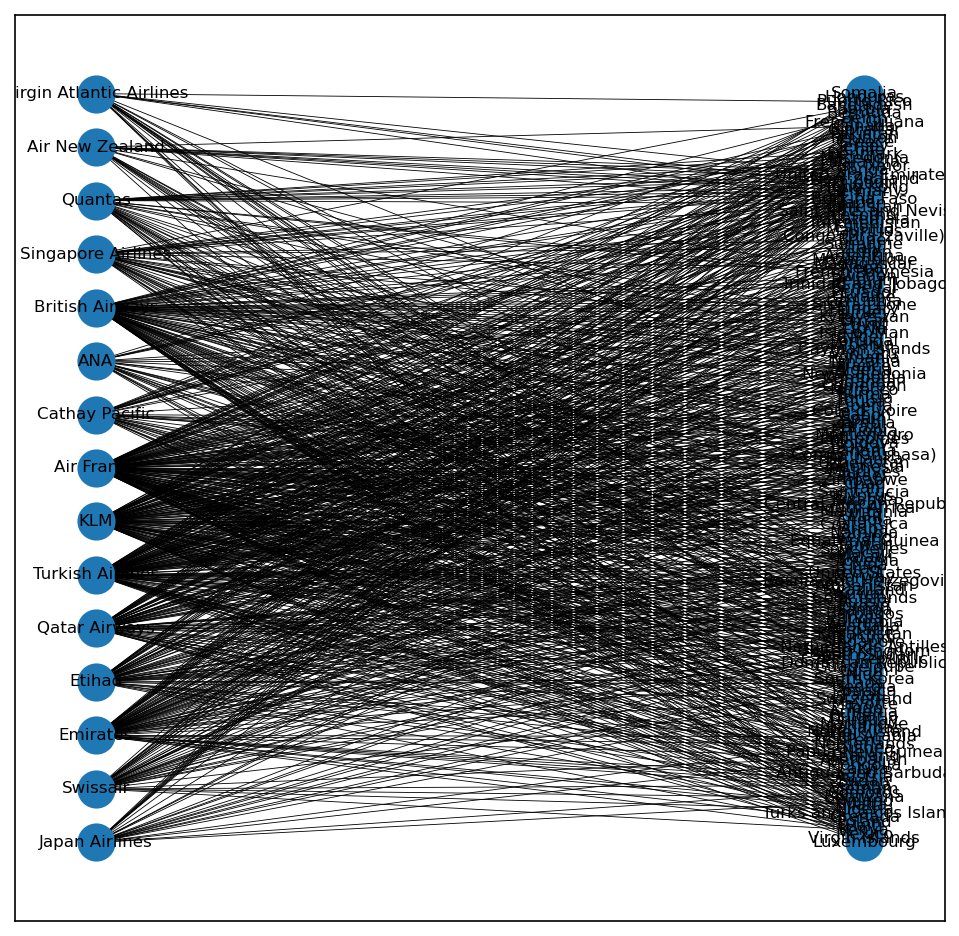

In [153]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(B)
fig, ax = plt.subplots(1,1,figsize=(8,8), dpi=150)
nx.draw_networkx(B, pos = nx.drawing.layout.bipartite_layout(B, Airline),font_size=8,width=0.4)

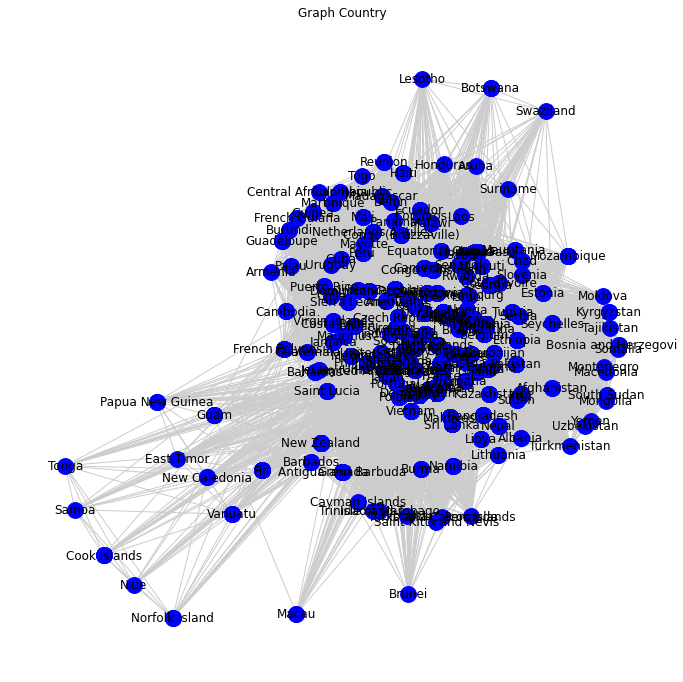

In [166]:
G = bipartite.weighted_projected_graph(B,Country)
plt.figure(figsize=(12,12))

layout = nx.spring_layout(G)

nx.draw_networkx_nodes(G, layout,nodelist=Country,node_size=250,node_color='blue')
nx.draw_networkx_edges(G, layout, edge_color='#cccccc')
node_labels = dict(zip(Country, Country))
nx.draw_networkx_labels(G, layout, labels=node_labels)
plt.axis('off')

plt.title("Graph Country")

plt.show()

In [168]:
labels = nx.get_edge_attributes(G, 'weight')
df2 = pd.DataFrame(columns=['source', 'target', 'weight'])
for key, value in labels.items():
    df2 = df2.append({'source':key[0], 'target':key[1], 'weight':value}, ignore_index=True)
    df2.to_csv (r'gelphi.csv', index = False, header=True)

In [169]:
df = pd.read_csv('gelphi.csv', usecols=['source', 'target'])
df.dropna()
df.drop_duplicates()
df

source          target
0      United States      Luxembourg
1      United States  Virgin Islands
2      United States          Mexico
3      United States           Kenya
4      United States          Poland
...              ...             ...
12255      Macedonia      Montenegro
12256      Macedonia        Mongolia
12257     Uzbekistan      Montenegro
12258     Uzbekistan        Mongolia
12259     Montenegro        Mongolia

[12260 rows x 2 columns]

In [170]:
G = nx.Graph()

edges = df[['source', 'target']]
G = nx.from_pandas_edgelist(edges, 'source', 'target')

print('Số đỉnh của đồ thị là', len(G.nodes()))
print('Số cạnh của đồ thị là', len(G.edges()))

Số đỉnh của đồ thị là 185
Số cạnh của đồ thị là 12260


In [171]:
print('Kiểm tra đồ thị liên thông: ')
nx.is_connected(G)

Kiểm tra đồ thị liên thông: 


True

No handles with labels found to put in legend.


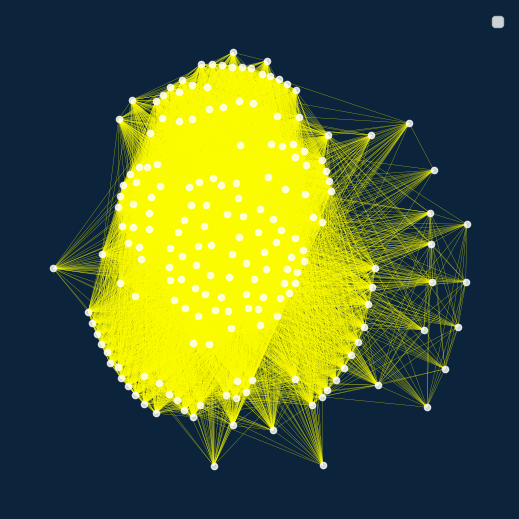

In [172]:
# %load_ext autotime
# nx.draw_networkx(G)

pd.set_option('precision',10)

nodes = G.nodes()
degree = G.degree()
colors = [degree[n] for n in nodes]

pos = nx.kamada_kawai_layout(G)

cmap = plt.cm.viridis_r
cmap = plt.cm.Greys

vmin = min(colors)
vmax = max(colors)

fig = plt.figure(figsize = (5,5), dpi=100)

nx.draw(G,pos,alpha = 0.8, nodelist = nodes, node_color = 'w', node_size = 20, with_labels= False,font_size = 6, width = 0.2, cmap = cmap, edge_color ='yellow')
fig.set_facecolor('#0B243B')

plt.legend()
plt.show()

# GEOMETRIC MEASURES

In [173]:
nx.average_shortest_path_length(G)

1.2796709753231492

Degree Centrality
Denition:
Number of Neighbors I Have / Number of Neighbors I Could Possibly Have

In [174]:
# average degree

average_degree = sum([len(list(G.neighbors(n))) for n in G.nodes()]) / len(G.nodes())

print('Average degree: ', average_degree)

Average degree:  132.54054054054055


In [175]:
#degree of each node
def print_table(data, columns):
  df = pd.DataFrame(data, columns=columns)
  return df

degree_dict = { node: 0 for node in G.nodes() }

for node in G.nodes():
  degree_dict[node] = len(list(G.neighbors(node)))

degree_df = print_table(degree_dict.items(), ['Node', 'Degree'])

degree_df

Node  Degree
0     United States     184
1        Luxembourg     164
2    Virgin Islands     146
3            Mexico     162
4             Kenya     176
..              ...     ...
180          Serbia     152
181      Bangladesh     118
182     Puerto Rico     133
183        Honduras      94
184         Somalia     104

[185 rows x 2 columns]

Biểu đồ thể hiện giá trị bậc của các node trong graph


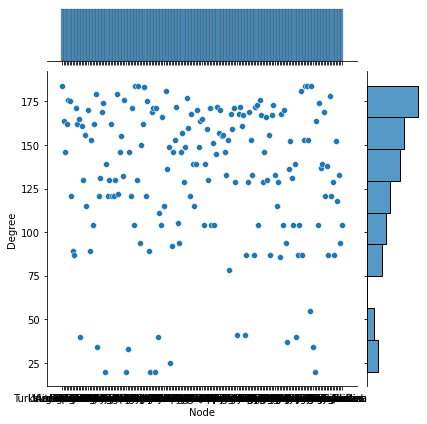

In [176]:
print(colored("Biểu đồ thể hiện giá trị bậc của các node trong graph", 'green', attrs=['bold']))
sns.jointplot(x="Node", y="Degree", data=degree_df)

Biểu đồ thể hiện phân bố bậc của các node trong graph


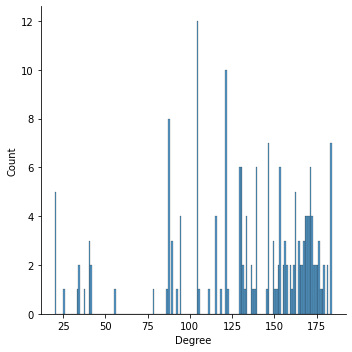

In [177]:
print(colored("Biểu đồ thể hiện phân bố bậc của các node trong graph", 'green', attrs=['bold']))
sns.displot(x="Degree", data=degree_df, binwidth=1)

In [178]:
sorted_degree_dict = sorted(degree_dict.items(), key=lambda item: item[1], reverse=True)
top_10_max_degree = list(sorted_degree_dict)[:10]

print('Top 10 node có bậc cao nhất : ')
print_table(top_10_max_degree, ['Node', 'Degree'])

Top 10 node có bậc cao nhất : 


Node  Degree
0         United States     184
1        United Kingdom     184
2             Singapore     184
3               Germany     184
4             Hong Kong     184
5  United Arab Emirates     184
6             Australia     183
7                 China     181
8                 Japan     181
9              Thailand     179

In [179]:
sorted_degree_dict = sorted(degree_dict.items(), key=lambda item: item[1], reverse=False)
top_10_min_degree = list(sorted_degree_dict)[:10]

print('Top 10 node có bậc thấp nhất : ')
print_table(top_10_min_degree, ['Node', 'Degree'])

Top 10 node có bậc thấp nhất : 


Node  Degree
0    Norfolk Island      20
1              Niue      20
2             Samoa      20
3      Cook Islands      20
4             Tonga      20
5             Macau      25
6              Guam      33
7  Papua New Guinea      34
8        East Timor      34
9            Brunei      37

In [181]:
# degree centrality

deg_cen = nx.degree_centrality(G) # return a dictionary
sorted_deg_cen = sorted(deg_cen.items(), key=lambda x:x[1], reverse=True)
deg_cen_df = print_table(sorted_deg_cen, ['Country', 'Degree centrality'])
deg_cen_df

Country  Degree centrality
0     United States       1.0000000000
1    United Kingdom       1.0000000000
2         Singapore       1.0000000000
3           Germany       1.0000000000
4         Hong Kong       1.0000000000
..              ...                ...
180  Norfolk Island       0.1086956522
181            Niue       0.1086956522
182           Samoa       0.1086956522
183    Cook Islands       0.1086956522
184           Tonga       0.1086956522

[185 rows x 2 columns]

In [182]:
print('Top 5 quốc gia có Degree centrality cao nhất: ')
print_table(sorted_deg_cen[:5], ['Country', 'Degree centrality'])

Top 5 quốc gia có Degree centrality cao nhất: 


Country  Degree centrality
0   United States                1.0
1  United Kingdom                1.0
2       Singapore                1.0
3         Germany                1.0
4       Hong Kong                1.0

In [183]:
print('Top 5 Quốc gia có Degree centrality thấp nhất: ')
print_table(sorted_deg_cen[-5:],  ['Country', 'Degree centrality'])

Top 5 Quốc gia có Degree centrality thấp nhất: 


Country  Degree centrality
0  Norfolk Island       0.1086956522
1            Niue       0.1086956522
2           Samoa       0.1086956522
3    Cook Islands       0.1086956522
4           Tonga       0.1086956522

# Closeness-centrality

In [188]:
# reverse (bool, optional (default=False)) – If True and G is a digraph, reverse the edges of G, using successors instead of predecessors.
closeness_centrality = nx.closeness_centrality(G)

sorted_closeness_centrality = sorted(closeness_centrality.items(), key=lambda x:x[1], reverse=True)
closeness_centrality_df = print_table(closeness_centrality.items(), ['Node', 'Closeness centrality'])

closeness_centrality_df

Node  Closeness centrality
0     United States          1.0000000000
1        Luxembourg          0.9019607843
2    Virgin Islands          0.8288288288
3            Mexico          0.8932038835
4             Kenya          0.9583333333
..              ...                   ...
180          Serbia          0.8518518519
181      Bangladesh          0.7360000000
182     Puerto Rico          0.7829787234
183        Honduras          0.6715328467
184         Somalia          0.6969696970

[185 rows x 2 columns]

Biểu đồ thể hiện giá trị closeness centrality của các node trong graph


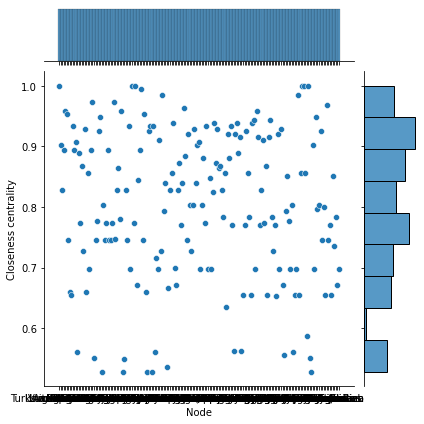

In [108]:
print(colored("Biểu đồ thể hiện giá trị closeness centrality của các node trong graph", 'green', attrs=['bold']))
sns.jointplot(x="Node", y="Closeness centrality", data=closeness_centrality_df)

Biểu đồ thể hiện phân bố closeness centrality của các node trong graph


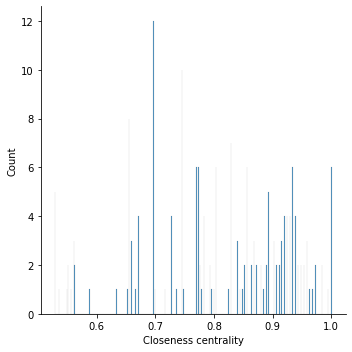

In [109]:
print(colored("Biểu đồ thể hiện phân bố closeness centrality của các node trong graph", 'green', attrs=['bold']))
sns.displot(x="Closeness centrality", data=closeness_centrality_df, binwidth=0.001)

In [226]:
top_ten_max_closeness_cen = sorted_closeness_centrality[:10]
print('Top 10 quốc gia có Closeness centrality cao nhất: ')
print_table(top_ten_max_closeness_cen, ['Counrty', 'Closeness centrality'])

Top 10 quốc gia có Closeness centrality cao nhất: 


Counrty  Closeness centrality
0        United Kingdom                 184.0
1             Singapore                 184.0
2         United States                 184.0
3               Germany                 184.0
4             Hong Kong                 184.0
5  United Arab Emirates                 184.0
6             Australia                 183.5
7                 China                 182.5
8                 Japan                 182.5
9              Thailand                 181.5

In [227]:
top_ten_min_closeness_cen = sorted_closeness_centrality[-10:]
print('Top 10 quốc gia có Closeness centrality nhỏ nhất: ')
print_table(top_ten_min_closeness_cen, ['Counrty', 'Closeness centrality'])

Top 10 quốc gia có Closeness centrality nhỏ nhất: 


Counrty  Closeness centrality
0            Brunei                 110.5
1  Papua New Guinea                 109.0
2        East Timor                 109.0
3              Guam                 108.5
4             Macau                 104.5
5    Norfolk Island                 102.0
6              Niue                 102.0
7             Samoa                 102.0
8      Cook Islands                 102.0
9             Tonga                 102.0

# Harmonic centrality

In [192]:
harmonic_cen = nx.harmonic_centrality(G)

sorted_closeness_centrality = sorted(harmonic_cen.items(), key=lambda x:x[1], reverse=True)
harmonic_cen_df = print_table(harmonic_cen.items(), ['Node', 'Harmonic centrality'])

harmonic_cen_df

Node  Harmonic centrality
0        Luxembourg                174.0
1    Virgin Islands                165.0
2            Mexico                173.0
3             Kenya                180.0
4            Poland                179.5
..              ...                  ...
180          Serbia                168.0
181      Bangladesh                151.0
182     Puerto Rico                158.5
183        Honduras                139.0
184         Somalia                144.0

[185 rows x 2 columns]

Biểu đồ thể hiện giá trị harmonic centrality của các node trong graph


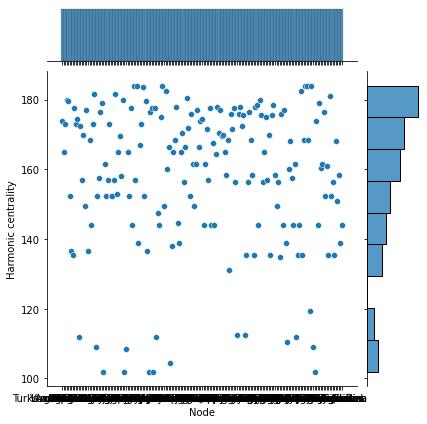

In [193]:
print(colored("Biểu đồ thể hiện giá trị harmonic centrality của các node trong graph", 'green', attrs=['bold']))
sns.jointplot(x="Node", y="Harmonic centrality", data=harmonic_cen_df)

Biểu đồ thể hiện phân bố harmonic centrality của các node trong graph


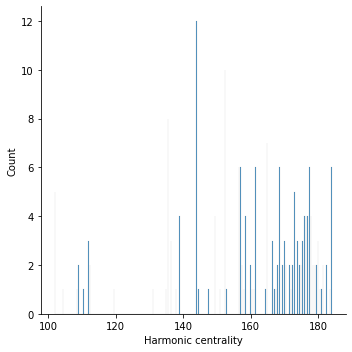

In [194]:
print(colored("Biểu đồ thể hiện phân bố harmonic centrality của các node trong graph", 'green', attrs=['bold']))
sns.displot(x="Harmonic centrality", data=harmonic_cen_df, binwidth=0.15)

In [196]:
print('Top 10 quốc gia có Harmonic centrality cao nhất: ')
print_table(sorted_deg_cen[:10], ['Country', 'Harmonic centrality'])

Top 10 quốc gia có Harmonic centrality cao nhất: 


Country  Harmonic centrality
0         United States         1.0000000000
1        United Kingdom         1.0000000000
2             Singapore         1.0000000000
3               Germany         1.0000000000
4             Hong Kong         1.0000000000
5  United Arab Emirates         1.0000000000
6             Australia         0.9945652174
7                 China         0.9836956522
8                 Japan         0.9836956522
9              Thailand         0.9728260870

In [197]:
print('Top 10 quốc gia có Harmonic centrality thấp nhất: ')
print_table(sorted_deg_cen[-10:], ['Country', 'Harmonic centrality'])

Top 10 quốc gia có Harmonic centrality thấp nhất: 


Country  Harmonic centrality
0            Brunei         0.2010869565
1  Papua New Guinea         0.1847826087
2        East Timor         0.1847826087
3              Guam         0.1793478261
4             Macau         0.1358695652
5    Norfolk Island         0.1086956522
6              Niue         0.1086956522
7             Samoa         0.1086956522
8      Cook Islands         0.1086956522
9             Tonga         0.1086956522

# SPECTRAL MEASURES

#### Eigenvector Centrality

In [198]:
eig_cen = nx.eigenvector_centrality(G, max_iter=100)

sorted_eig_cen = sorted(eig_cen.items(), key=lambda x:x[1], reverse=True)

eig_cen_df = print_table(eig_cen.items(), ['Node', 'Eigenvector Centrality'])

eig_cen_df

Node  Eigenvector Centrality
0     United States            0.0895678878
1        Luxembourg            0.0864703433
2    Virgin Islands            0.0790599287
3            Mexico            0.0829148808
4             Kenya            0.0889129057
..              ...                     ...
180          Serbia            0.0821997231
181      Bangladesh            0.0643092673
182     Puerto Rico            0.0738681168
183        Honduras            0.0540258751
184         Somalia            0.0583541646

[185 rows x 2 columns]

Biểu đồ thể hiện giá trị Eigenvector centrality của các node trong graph


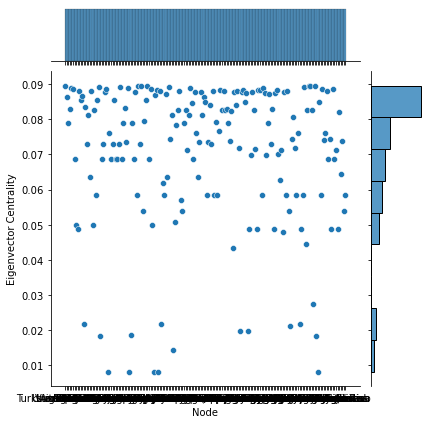

In [116]:
print(colored("Biểu đồ thể hiện giá trị Eigenvector centrality của các node trong graph", 'green', attrs=['bold']))
sns.jointplot(x="Node", y="Eigenvector Centrality", data=eig_cen_df)

Biểu đồ thể hiện phân bố Eigenvector Centrality của các node trong graph


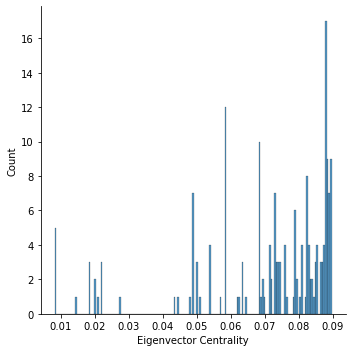

In [117]:
print(colored("Biểu đồ thể hiện phân bố Eigenvector Centrality của các node trong graph", 'green', attrs=['bold']))
sns.displot(x="Eigenvector Centrality", data=eig_cen_df, binwidth=0.0005)

In [223]:
top_ten_max_eig_cen_df = sorted_eig_cen[:10]
print('Top 10 quốc gia có Eigenvector Centrality lớn nhất: ')
print_table(top_ten_max_eig_cen_df, ['Country', 'Eigenvector Centrality'])

Top 10 quốc gia có Eigenvector Centrality lớn nhất: 


Country  Eigenvector Centrality
0               Germany            0.0895678878
1             Hong Kong            0.0895678878
2  United Arab Emirates            0.0895678878
3         United States            0.0895678878
4        United Kingdom            0.0895678878
5             Singapore            0.0895678878
6             Australia            0.0894692370
7              Thailand            0.0892851397
8           Switzerland            0.0892851397
9                 China            0.0891188739

In [224]:
top_ten_min_eig_cen_df = sorted_eig_cen[-5:]
print('Top 10 quốc gia có Eigenvector Centrality nhỏ nhất: ')
print_table(top_ten_min_eig_cen_df, ['Country', 'Eigenvector Centrality'])

Top 10 quốc gia có Eigenvector Centrality nhỏ nhất: 


Country  Eigenvector Centrality
0  Norfolk Island            0.0082369362
1            Niue            0.0082369362
2           Samoa            0.0082369362
3    Cook Islands            0.0082369362
4           Tonga            0.0082369362

## Page rank

In [120]:
pagerank = nx.pagerank(G, tol=1e-6, alpha=0.85)
sorted_pagerank = sorted(pagerank.items(), key=lambda x:x[1], reverse=True)

pagerank_df = print_table(pagerank.items(), ['Node', 'Pagerank'])

pagerank_df

Node      Pagerank
0     United States  0.0075059055
1        Luxembourg  0.0064453442
2    Virgin Islands  0.0058074219
3            Mexico  0.0066085787
4             Kenya  0.0069882023
..              ...           ...
180          Serbia  0.0060080489
181      Bangladesh  0.0048710391
182     Puerto Rico  0.0053404190
183        Honduras  0.0039996720
184         Somalia  0.0043516300

[185 rows x 2 columns]

Biểu đồ thể hiện giá trị pagerank của các node trong graph


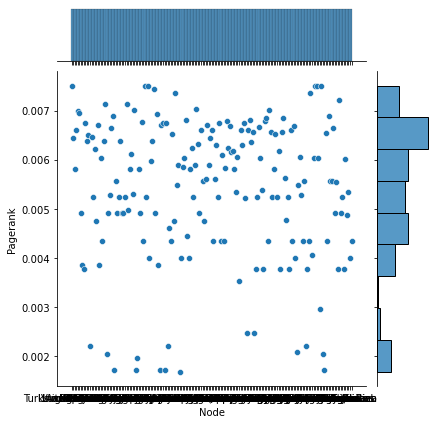

In [121]:
print(colored("Biểu đồ thể hiện giá trị pagerank của các node trong graph", 'green', attrs=['bold']))
sns.jointplot(x="Node", y="Pagerank", data=pagerank_df)

Biểu đồ thể hiện phân bố pagerank của các node trong graph


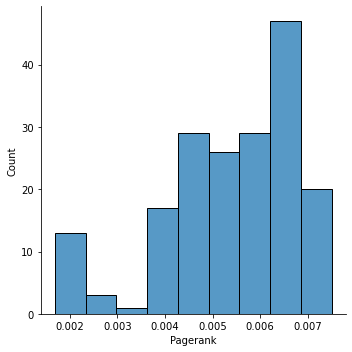

In [122]:
print(colored("Biểu đồ thể hiện phân bố pagerank của các node trong graph", 'green', attrs=['bold']))
sns.displot(x="Pagerank", data=pagerank_df)

In [222]:
top_ten_max_pagerank = sorted_pagerank[:10]
print('Top 10 quốc gia có Pagerank lớn nhất: ')
print_table(top_ten_max_pagerank, ['Country', 'Pagerank'])

Top 10 quốc gia có Pagerank lớn nhất: 


Country      Pagerank
0         United States  0.0075059055
1        United Kingdom  0.0075059055
2             Singapore  0.0075059055
3               Germany  0.0075059055
4             Hong Kong  0.0075059055
5  United Arab Emirates  0.0075059055
6             Australia  0.0074486729
7                 China  0.0073654532
8                 Japan  0.0073654532
9                Canada  0.0072156292

In [225]:
top_ten_min_pagerank = sorted_pagerank[-10:]
print('Top 10 quốc gia có Pagerank nhỏ nhất: ')
print_table(top_ten_min_pagerank, ['Country', 'Pagerank'])

Top 10 quốc gia có Pagerank nhỏ nhất: 


Country      Pagerank
0            Brunei  0.0020836911
1        East Timor  0.0020409884
2  Papua New Guinea  0.0020409884
3              Guam  0.0019667707
4    Norfolk Island  0.0017059252
5              Niue  0.0017059252
6             Tonga  0.0017059252
7             Samoa  0.0017059252
8      Cook Islands  0.0017059252
9             Macau  0.0016853291

# PATH-BASED MEASURES

## Betweenness Centrality

In [125]:
bet_cen = nx.betweenness_centrality(G, normalized=False) #returns a dictionary
sorted_bet_cen = sorted(bet_cen.items(), key=lambda x:x[1], reverse=True)

bet_cen_df = print_table(bet_cen.items(), ['Node', 'Betweenness centrality'])

bet_cen_df

Node  Betweenness centrality
0     United States          151.0055055755
1        Luxembourg           26.0007629709
2    Virgin Islands           12.7295095319
3            Mexico           86.6705941028
4             Kenya           66.3958728780
..              ...                     ...
180          Serbia           14.4492785064
181      Bangladesh            7.3856212285
182     Puerto Rico            4.7554435930
183        Honduras            0.0000000000
184         Somalia            0.0000000000

[185 rows x 2 columns]

Biểu đồ thể hiện giá trị betweenness centrality của các node trong graph


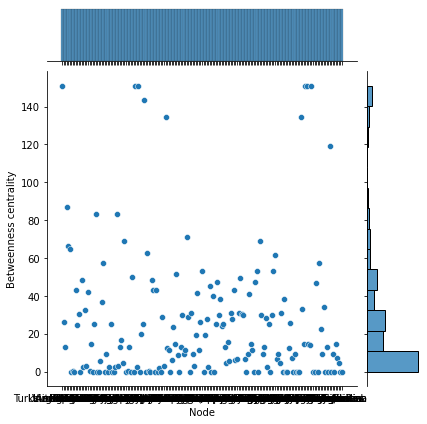

In [126]:
print(colored("Biểu đồ thể hiện giá trị betweenness centrality của các node trong graph", 'green', attrs=['bold']))
sns.jointplot(x="Node", y="Betweenness centrality", data=bet_cen_df)

Biểu đồ thể hiện phân bố betweenness centrality của các node trong graph


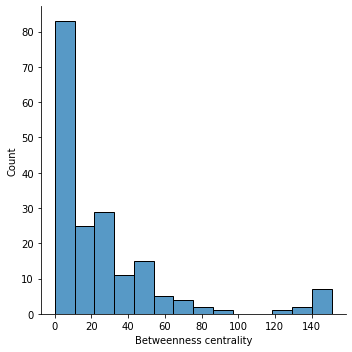

In [127]:
print(colored("Biểu đồ thể hiện phân bố betweenness centrality của các node trong graph", 'green', attrs=['bold']))
sns.displot(x="Betweenness centrality", data=bet_cen_df)

In [220]:
top_ten_max_bet_cen = sorted_bet_cen[:10]
print('Top 10 quốc gia có Betweenness centrality lớn nhất: ')
print_table(top_ten_max_bet_cen, ['Country', 'Betweenness centrality'])

Top 10 quốc gia có Betweenness centrality lớn nhất: 


Country  Betweenness centrality
0         United States          151.0055055755
1        United Kingdom          151.0055055755
2             Singapore          151.0055055755
3               Germany          151.0055055755
4             Hong Kong          151.0055055755
5  United Arab Emirates          151.0055055755
6             Australia          143.4072815142
7                 China          134.6209859181
8                 Japan          134.6209859181
9                Canada          118.9834569691

In [228]:
top_ten_min_bet_cen = sorted_bet_cen[-10:]
print('Top 10 quốc gia có Betweenness centrality nhỏ nhất: ')
print_table(top_ten_min_bet_cen, ['Country', 'Betweenness centrality'])

Top 10 quốc gia có Betweenness centrality nhỏ nhất: 


Country  Betweenness centrality
0     Tajikistan                     0.0
1     East Timor                     0.0
2          Tonga                     0.0
3      Macedonia                     0.0
4        Reunion                     0.0
5      Gibraltar                     0.0
6  French Guiana                     0.0
7        Bermuda                     0.0
8       Honduras                     0.0
9        Somalia                     0.0

# CLUSTER ALGORITHM

#### Girvan-Newman

In [130]:
def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge

In [131]:
def girvan_newman(graph):
    # find number of connected components
    sg = nx.connected_components(graph)
    sg_count = nx.number_connected_components(graph)

    while(sg_count == 1):
        graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
        sg = nx.connected_components(graph)
        sg_count = nx.number_connected_components(graph)
    return sg

In [132]:
# find communities in the graph
c = girvan_newman(G.copy())

# find the nodes forming the communities
node_groups = []

for i in c:
  node_groups.append(list(i))

In [133]:
print(node_groups)

[['Luxembourg', 'Virgin Islands', 'Mexico', 'Kenya', 'Poland', 'Haiti', 'Grenada', 'Turks and Caicos Islands', 'Nigeria', 'Malta', 'Finland', 'Botswana', 'Vietnam', 'Comoros', 'Ghana', 'Sudan', 'Austria', 'Antigua and Barbuda', 'Latvia', 'Mongolia', 'Azerbaijan', 'Thailand', 'Papua New Guinea', 'Guinea', 'Peru', 'Netherlands', 'Saudi Arabia', 'Norfolk Island', 'Bahamas', 'Martinique', 'Uruguay', 'Bulgaria', 'Armenia', 'Togo', 'Mayotte', 'Switzerland', 'Palau', 'Jamaica', 'Georgia', 'Laos', 'South Korea', 'Niue', 'Guam', 'Dominican Republic', 'Guadeloupe', 'Czech Republic', 'South Sudan', 'United Kingdom', 'Netherlands Antilles', 'Singapore', 'Burundi', 'Kazakhstan', 'Croatia', 'Australia', 'Colombia', 'India', 'Barbados', 'Samoa', 'Jordan', 'Russia', 'Cook Islands', 'Kuwait', 'Swaziland', 'Afghanistan', 'Bosnia and Herzegovina', 'Norway', 'United States', 'Iraq', 'China', 'Malawi', 'Slovenia', 'Macau', 'Seychelles', 'Taiwan', 'Equatorial Guinea', 'Ireland', 'Namibia', 'Aruba', 'Costa R

No handles with labels found to put in legend.


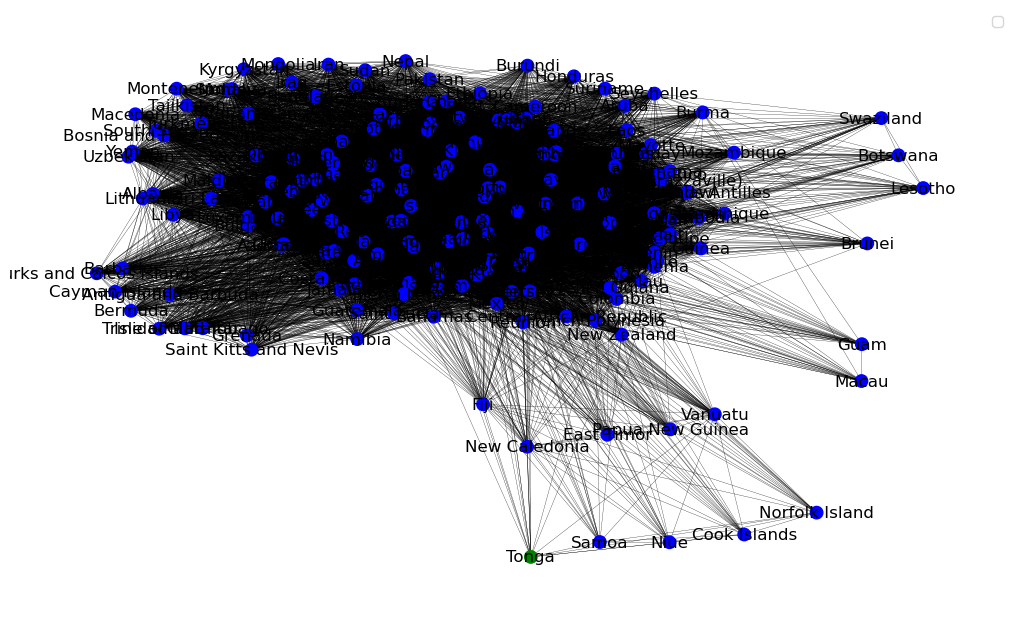

In [134]:
# plot the communities
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  

pd.set_option('precision',10)

nodes = G.nodes()
degree = G.degree()
colors = [degree[n] for n in nodes]

pos = nx.spring_layout(G)
fig = plt.figure(figsize = (10,6), dpi=100)



cmap = plt.cm.viridis_r
cmap = plt.cm.Greys

vmin = min(colors)
vmax = max(colors)


nx.draw(G, node_color=color_map, with_labels=True,node_size = 80,width = 0.2)
# nx.draw(G,pos,alpha = 0.8, nodelist = nodes, node_color = color_map, node_size = 20, with_labels= False,font_size = 6, width = 0.2, cmap = cmap, edge_color ='yellow')


plt.legend()
plt.show()

#### Louvain

<Figure size 1224x864 with 0 Axes>

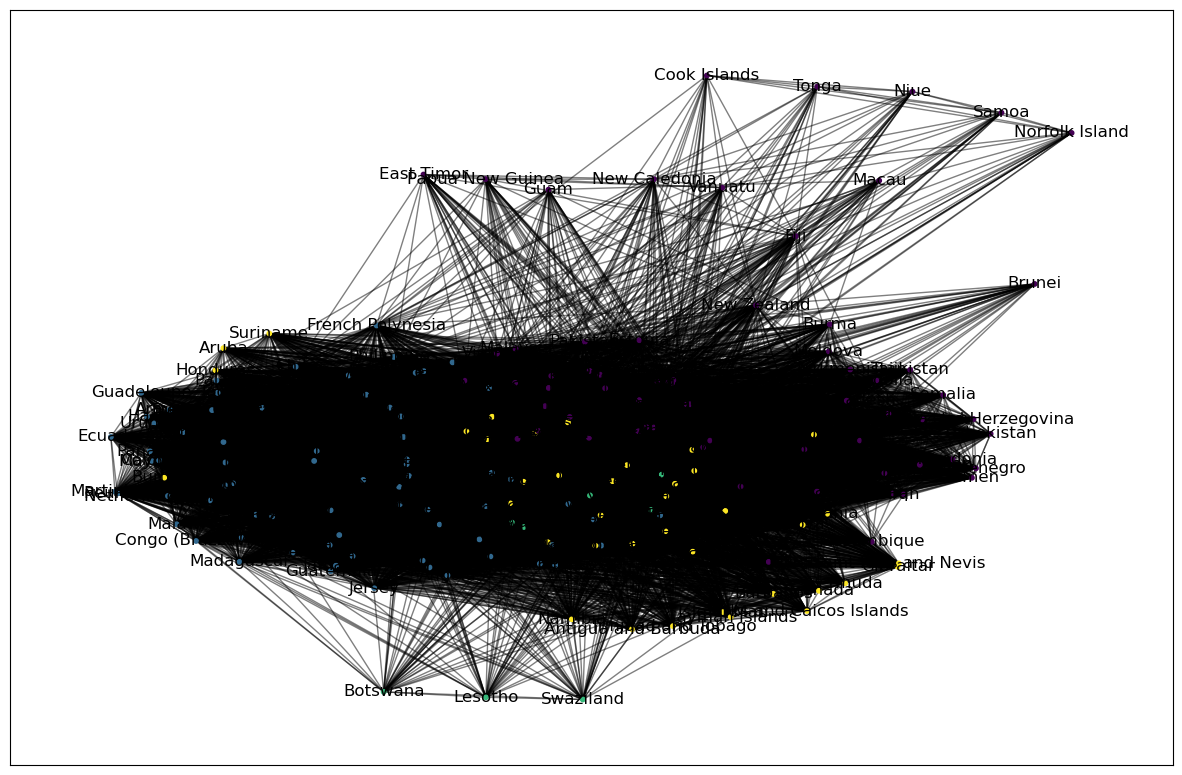

In [135]:
plt.figure(figsize=(17,12))

#compute the best partition
partition = community_louvain.best_partition(G)

#draw the graph
pos = nx.spring_layout(G)

#color the nodes according to their partition
fig = plt.figure(figsize = (15,10), dpi=100)

cmap = cm.get_cmap('viridis', max(partition.values())+1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=10,cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)

plt.show()

In [136]:
clusters = set([cluster for _, cluster in partition.items()])
print('Số cụm trong graph là: ', len(clusters))

Số cụm trong graph là:  4


Cụm 0 #440154


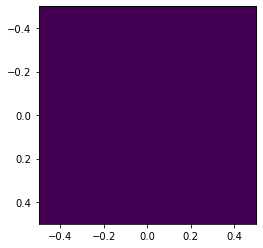

--------------------------------------
Cụm 1 #31688e


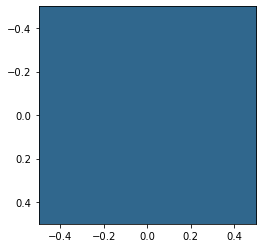

--------------------------------------
Cụm 2 #35b779


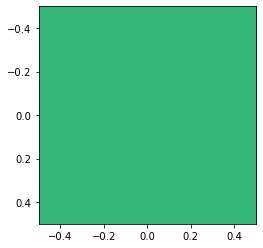

--------------------------------------
Cụm 3 #fde725


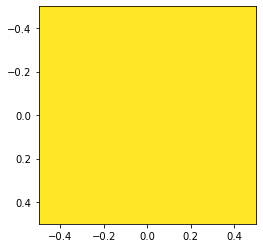

--------------------------------------


In [137]:
for i in set(partition.values()):
    rgba = cmap(i)
    print('Cụm' ,i, matplotlib.colors.rgb2hex(rgba))
    plt.imshow([[cmap(i)]])
    plt.show()
    print('--------------------------------------')

In [138]:
for i in range(len(clusters)):
    print("nhom",i,"***************")
    for name,k in partition.items():
        if k==i:
            print(name)
    print("")

nhom 0 ***************
United States
Poland
Vietnam
Sudan
Mongolia
Thailand
Papua New Guinea
Saudi Arabia
Norfolk Island
Switzerland
South Korea
Niue
Guam
South Sudan
United Kingdom
Singapore
Australia
Samoa
Jordan
Cook Islands
Afghanistan
Bosnia and Herzegovina
Iraq
China
Macau
Seychelles
Ireland
South Africa
Iran
Maldives
Indonesia
Uzbekistan
Sri Lanka
Moldova
Montenegro
Ethiopia
Burma
New Caledonia
France
Vanuatu
Oman
Kyrgyzstan
Turkey
Sweden
Nepal
Mozambique
Yemen
Brunei
Estonia
Turkmenistan
Tajikistan
Japan
New Zealand
Germany
Hong Kong
Fiji
United Arab Emirates
East Timor
Tonga
Malaysia
Macedonia
Denmark
Pakistan
Canada
Bangladesh
Somalia

nhom 1 ***************
Luxembourg
Virgin Islands
Mexico
Haiti
Malta
Finland
Comoros
Latvia
Azerbaijan
Guinea
Peru
Bahamas
Martinique
Uruguay
Bulgaria
Armenia
Togo
Mayotte
Palau
Jamaica
Georgia
Laos
Dominican Republic
Guadeloupe
Netherlands Antilles
Croatia
Colombia
Norway
Malawi
Slovenia
Taiwan
Equatorial Guinea
Costa Rica
Angola
Mali
Mauritani

In [139]:
print('Bảng chi tiết cluster trong graph: ')
cluster_df = print_table(partition.items(), ['Node', 'Cluster'])
cluster_df

Bảng chi tiết cluster trong graph: 


Node  Cluster
0     United States        0
1        Luxembourg        1
2    Virgin Islands        1
3            Mexico        1
4             Kenya        3
..              ...      ...
180          Serbia        1
181      Bangladesh        0
182     Puerto Rico        1
183        Honduras        3
184         Somalia        0

[185 rows x 2 columns]

In [229]:
cluster_df.to_csv("louvain.csv")

#### Label propagation

In [140]:

lpc=label_propagation_communities(G.copy())

# find the nodes forming the communities
node_groups_lpc = []

for i in lpc:
  node_groups_lpc.append(list(i))

In [141]:
print(node_groups_lpc)

[['Luxembourg', 'Virgin Islands', 'Mexico', 'Kenya', 'Poland', 'Haiti', 'Grenada', 'Turks and Caicos Islands', 'Nigeria', 'Malta', 'Finland', 'Botswana', 'Vietnam', 'Comoros', 'Ghana', 'Sudan', 'Austria', 'Antigua and Barbuda', 'Latvia', 'Mongolia', 'Azerbaijan', 'Thailand', 'Papua New Guinea', 'Guinea', 'Peru', 'Netherlands', 'Saudi Arabia', 'Norfolk Island', 'Bahamas', 'Martinique', 'Uruguay', 'Bulgaria', 'Armenia', 'Togo', 'Mayotte', 'Switzerland', 'Palau', 'Jamaica', 'Georgia', 'Laos', 'South Korea', 'Niue', 'Guam', 'Dominican Republic', 'Guadeloupe', 'Czech Republic', 'South Sudan', 'United Kingdom', 'Netherlands Antilles', 'Singapore', 'Burundi', 'Kazakhstan', 'Croatia', 'Australia', 'Colombia', 'India', 'Barbados', 'Samoa', 'Jordan', 'Russia', 'Cook Islands', 'Kuwait', 'Swaziland', 'Afghanistan', 'Bosnia and Herzegovina', 'Norway', 'United States', 'Iraq', 'China', 'Malawi', 'Slovenia', 'Macau', 'Seychelles', 'Taiwan', 'Equatorial Guinea', 'Ireland', 'Namibia', 'Aruba', 'Costa R

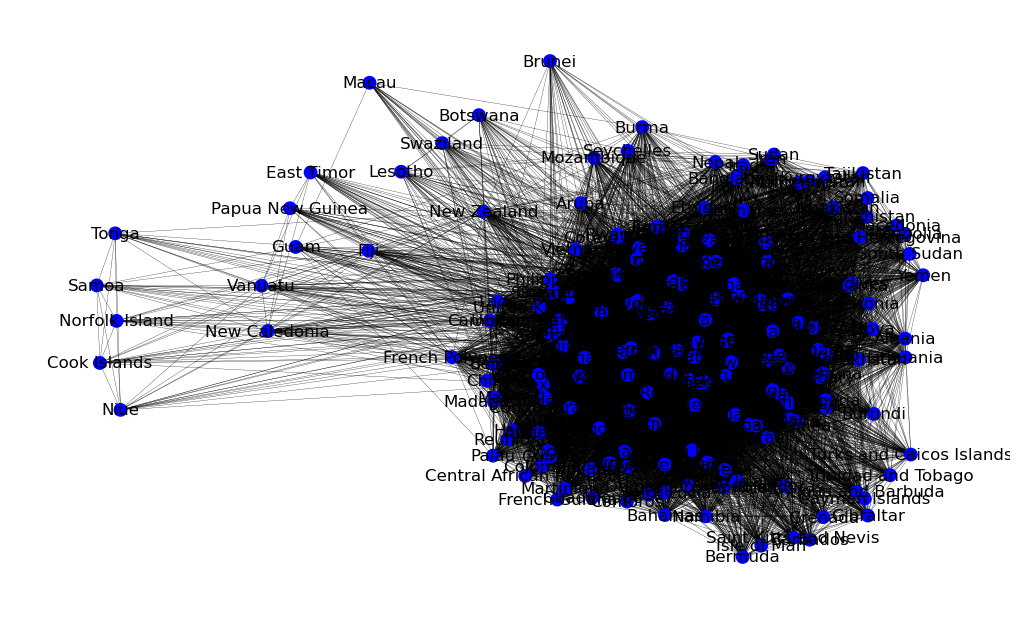

In [142]:
# plot the communities
color_map = []
for node in G:
    if node in node_groups_lpc[0]:
        color_map.append('blue')
    else: 
        color_map.append('red')  

pd.set_option('precision',10)

nodes = G.nodes()
degree = G.degree()
colors = [degree[n] for n in nodes]

pos = nx.spring_layout(G)
fig = plt.figure(figsize = (10,6), dpi=100)



cmap = plt.cm.viridis_r
cmap = plt.cm.Greys

vmin = min(colors)
vmax = max(colors)


nx.draw(G, node_color=color_map, with_labels=True,node_size = 80,width = 0.2)
# nx.draw(G,pos,alpha = 0.8, nodelist = nodes, node_color = color_map, node_size = 10, with_labels= False,font_size = 6, width = 0.2, cmap = cmap, edge_color ='yellow')


**K Means**

In [200]:
k = preprocessing.LabelEncoder()
dfkmean = dt.copy()
dfkmean

Airline        Country
0                   Air France  United States
1                   Air France  Cote d'Ivoire
2                   Air France  United States
3                   Air France        Nigeria
4                   Air France        Nigeria
...                        ...            ...
6135  Virgin Atlantic Airlines  United States
6136  Virgin Atlantic Airlines    Saint Lucia
6137  Virgin Atlantic Airlines    Saint Lucia
6138  Virgin Atlantic Airlines    Saint Lucia
6139  Virgin Atlantic Airlines         Russia

[6140 rows x 2 columns]

In [201]:
# Chuyển cột Agency thành cột có giá trị số tương ứng
k.fit(dfkmean['Airline'])
dfkmean['AirlineNum'] = k.transform(dfkmean['Airline'])
dfkmean['AirlineNum'].drop_duplicates()

0        1
1061     3
1601     4
1810     5
2092     6
2314     7
2696     8
3519     0
4051     2
4244    10
4658     9
4930    12
5131    11
5340    13
5950    14
Name: AirlineNum, dtype: int32

In [202]:
k.fit(dfkmean['Country'])
dfkmean['CountryNum'] = k.transform(dfkmean['Country'])
dfkmean['CountryNum'].drop_duplicates()

0       176
1        39
3       121
6       175
8       154
       ... 
5889     17
5892     97
5904    178
5909    111
5927    110
Name: CountryNum, Length: 185, dtype: int32

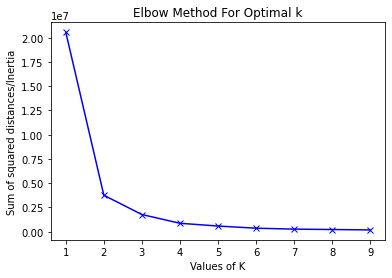

In [204]:
# Dự đoán số cụm xuất hiện trong Kmeans bảng phương pháp Elbow
import numpy as np
from sklearn.cluster import KMeans

sum_of_squared_distances = []
K = range(1, 10)
for num_clusters in K:
  kmeans = KMeans(n_clusters = num_clusters)
  kmeans.fit(dfkmean[['AirlineNum', 'CountryNum']])
  sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Values of K')
plt.ylabel( 'Sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

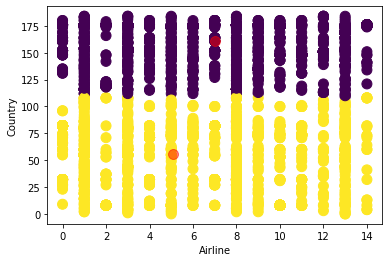

Toạ độ trung tâm cụm:  [[  7.03234421 160.96023739]
 [  5.08772563  55.81083032]]


In [205]:
algorithm = KMeans(n_clusters = 2, init='random' )
algorithm.fit(dfkmean[['AirlineNum','CountryNum']])
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_ #Gán toạ độ trung tâm cụm
plt.clf()
plt.scatter( x = 'AirlineNum' ,y = 'CountryNum' , data = dfkmean[['AirlineNum','CountryNum']], c = labels2, s = 100 )
plt.scatter(x = centroids2[: , 0], y =  centroids2[: , 1], s = 100, c = 'red', alpha = 0.5)
plt.ylabel('Country'), plt.xlabel('Airline')
plt.show()
print('Toạ độ trung tâm cụm: ', centroids2)

In [207]:
note = dfkmean.drop_duplicates(subset='Airline', keep="last")
print('Số Airline: ',len(note[['Airline','AirlineNum']]))
print(note[['Airline','AirlineNum']].to_string())

Số Airline:  15
                       Airline  AirlineNum
1060                Air France           1
1600           British Airways           3
1809            Cathay Pacific           4
2091                  Emirates           5
2313                    Etihad           6
2695            Japan Airlines           7
3518                       KLM           8
4050                       ANA           0
4243           Air New Zealand           2
4657                   Quantas          10
4929             Qatar Airways           9
5130                  Swissair          12
5339        Singapore Airlines          11
5949          Turkish Airlines          13
6139  Virgin Atlantic Airlines          14


In [208]:
noteGenre = dfkmean.drop_duplicates(subset='Country', keep="last")
print('Số Country: ',len(noteGenre[['Country','CountryNum']]))
print(noteGenre[['Country','CountryNum']].to_string())

Số Country:  185
                       Country  CountryNum
223   Central African Republic          29
286              French Guiana          56
287                   Colombia          33
463                     Guinea          68
528                    Armenia           6
552                 Martinique         104
671                       Togo         165
898                      Haiti          69
921                 Guadeloupe          65
1060                   Reunion         136
1100                   Bermuda          16
1193            Cayman Islands          28
1194                 Gibraltar          62
1206                 Guatemala          67
1227               Isle of Man          78
1230                    Jersey          83
1512                   Bahamas          11
1542  Turks and Caicos Islands         171
1563     Saint Kitts and Nevis         140
1571       Trinidad and Tobago         167
2272                      Laos          89
2659                     Palau       

In [210]:
clusterX = dfkmean.loc[dfkmean['AirlineNum'].isin([7, 8, 9])]
clusterY = dfkmean.loc[dfkmean['CountryNum'].isin([37, 38])]
pd.merge(clusterX, clusterY, how='inner', on=['AirlineNum', 'CountryNum'])[['Airline_x', "Country_x"]]
# dfkmean

Airline_x   Country_x
0       KLM  Costa Rica
1       KLM  Costa Rica
2       KLM  Costa Rica
3       KLM  Costa Rica
4       KLM  Costa Rica
5       KLM  Costa Rica
6       KLM  Costa Rica
7       KLM  Costa Rica
8       KLM  Costa Rica

In [211]:
clusterX = dfkmean.loc[dfkmean['AirlineNum'].isin([7])]
clusterY = dfkmean.loc[dfkmean['CountryNum'].isin([110, 111])]
pd.merge(clusterX, clusterY, how='inner', on=['AirlineNum', 'CountryNum'])[['Airline_x', "Country_x"]]

Empty DataFrame
Columns: [Airline_x, Country_x]
Index: []